# Python

Python, utilizzabile tramite la shell `ipython` integrata in Jupyter, gestisce in modo elegante la gestione di input e output.
Inoltre si possono usare entrambi da terminale sia come shell sia per richiamare file esterni già esistenti.

Le librerie `numpy` (per il calcolo vettoriale) e `pandas` (per la gestione di dati) sono di grande aiuto nel calcolo statistico.

In [1]:
import numpy as np
import pandas as pd

### Numpy

Gli array di numpy possono essere creati partendo da liste:

In [2]:
np.array([1, 2, 3])

array([1, 2, 3])

In [3]:
np.array([n for n in range(2, 101, 2)])  # partendo da una lista
## è possibile usare una funzione preesistente:
a1 = np.arange(2, 100, 2) 

Siccome usando un operatore logico su un array numpy questo si applica a ogni elemento, è possibile selezionare gli elementi allo stesso modo di R:

In [4]:
a1 > 5

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [5]:
a1[a1 > 5]

array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38,
       40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72,
       74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [6]:
a1[-4:]

array([92, 94, 96, 98])

È possibile cambiare le dimensioni di un array a piacimento:

In [7]:
a2 = np.arange(1, 101).reshape(2, 5, 10)
a2

array([[[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
        [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
        [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50]],

       [[ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
        [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
        [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
        [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]]])

In [8]:
a2[1, 1, 1]

62

In [9]:
a2[1, [1, 3, 4], :] 

array([[ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
       [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

Si possono comunque appiattire tutti gli array ad una sola dimensione:

In [10]:
a2[:, :, 0].ravel()

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

Si possono inoltre unire più array:

In [11]:
b = np.array([1, 2, 3, 4])
c = np.array([5, 6, 7, 8])

In [12]:
np.vstack((b, c))

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
np.hstack((b, c))

array([1, 2, 3, 4, 5, 6, 7, 8])

### Pandas

Simile ai dizionari della libreria standard, le serie di `pandas` contengono coppie chiave-valore; possono avere un indice esplicito o usare il numero dell'elemento:

In [14]:
g = pd.Series([30, 40, 50, 60])
g

0    30
1    40
2    50
3    60
dtype: int64

In [15]:
g.index

RangeIndex(start=0, stop=4, step=1)

In [16]:
g.values

array([30, 40, 50, 60])

In [17]:
g[2]

50

In [18]:
f = pd.Series(g.values, index = ["a", "b", "c", "d"])
f

a    30
b    40
c    50
d    60
dtype: int64

In [19]:
g = pd.Series(np.random.randint(50, 101, 4),
              index = ["a", "b", "c", "d"])
g

a    76
b    72
c    57
d    66
dtype: int64

La gestione dei valori mancanti in Pandas è immediata:

In [20]:
g["e"] = np.nan
g

a    76.0
b    72.0
c    57.0
d    66.0
e     NaN
dtype: float64

In [21]:
g.isna()

a    False
b    False
c    False
d    False
e     True
dtype: bool

In [22]:
g = g.fillna(0)
g

a    76.0
b    72.0
c    57.0
d    66.0
e     0.0
dtype: float64

Elemento cardine della libreria `pandas` è l'oggetto `DataFrame`:

In [23]:
age = pd.Series([36, 24, 16], index = ["Peter", "Susan", "Alex"])
heigh = pd.Series([167, 178, 160], index = ["Peter", "Susan", "Alex"])
people = pd.DataFrame({"age": age,
                       "heigh": heigh})
people

,age,heigh
Peter,36,167
Susan,24,178
Alex,16,160


In [24]:
people.values

array([[ 36, 167],
       [ 24, 178],
       [ 16, 160]])

In [25]:
people.index

Index(['Peter', 'Susan', 'Alex'], dtype='object')

Non si può tuttavia accedere ai dati del DataFrame come in R: occorre usare una funzione apposita (`iloc`), sia in lettura che in assegnamento.

In [26]:
people.iloc[2, 0]

16

In [27]:
people.iloc[2, 0] = 38
people

,age,heigh
Peter,36,167
Susan,24,178
Alex,38,160


L'aggiunta di nuove colonne avviene esattamente come per i dizionari della libreria standard:

In [28]:
people["gender"] = ["M", "F", "M"]
people

,age,heigh,gender
Peter,36,167,M
Susan,24,178,F
Alex,38,160,M


Si possono calcolare facilmente funzioni sui dati raggruppati grazie ad una funzione nativa:

In [29]:
people.groupby("gender")["heigh"].mean()

gender
F    178.0
M    163.5
Name: heigh, dtype: float64

Anche le statistiche descrittive fondamentali sono calcolate con una funzione nativa:

In [30]:
people.describe()

,age,heigh
count,3.000000,3.000000
mean,32.666667,168.333333
std,7.571878,9.073772
min,24.000000,160.000000
25%,30.000000,163.500000
50%,36.000000,167.000000
75%,37.000000,172.500000
max,38.000000,178.000000


### Dataset Planets

In [31]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [32]:
planets.size

6210

In [33]:
planets_clean = planets.dropna()
planets_clean.reset_index()
planets_clean.size

2988

In [34]:
planets["year"][19]

2002

In [35]:
planets_copy = planets_clean.copy()
pd.concat([planets_clean, planets_copy], axis = 1).head()

,method,number,orbital_period,mass,distance,year,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009,Radial Velocity,1,516.220,10.50,119.47,2009


In [36]:
planets_clean.append(planets_copy).size

5976

### Grafici

La libreria `matplotlib` permette di disegnare grafici in modo analogo alla libreria `ggplot2` di R.

In [37]:
import matplotlib.pyplot as plt

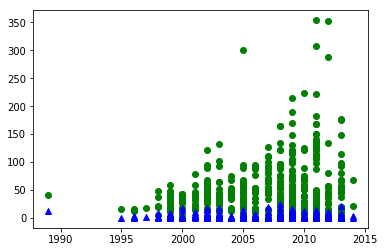

In [38]:
plt.plot(planets_clean["year"],
         planets_clean["distance"],
         "go")
plt.plot(planets_clean["year"],
         planets_clean["mass"],
         "^b")
plt.show()

È possibile anche disegnare più grafici contemporaneamente:

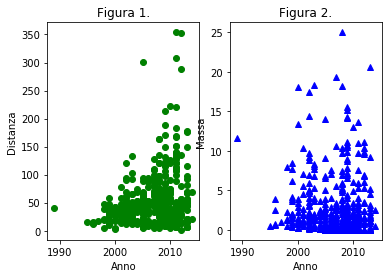

In [39]:
plt.subplot(1, 2, 1)  # nrows, ncols, index
plt.plot(planets_clean["year"],
         planets_clean["distance"],
         "go")
plt.title("Figura 1.")
plt.xlabel("Anno")
plt.ylabel("Distanza")
plt.subplot(1, 2, 2)
plt.plot(planets_clean["year"],
         planets_clean["mass"],
         "^b")
plt.title("Figura 2.")
plt.xlabel("Anno")
plt.ylabel("Massa")
plt.show()

La libreria `seaborn` (importata precedentemente) permette di disegnare grafici in modo più astratto.

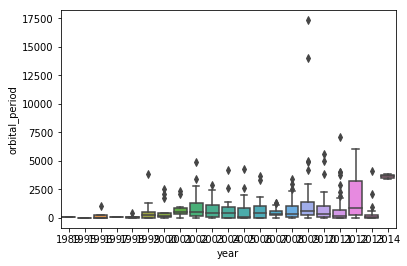

In [40]:
sns.boxplot(x = "year",
            y = "orbital_period",
            data = planets_clean)
plt.show()

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


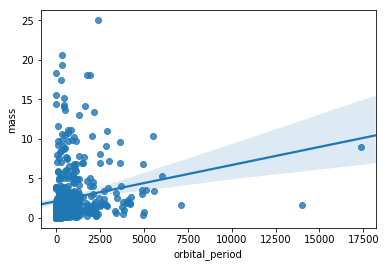

In [41]:
sns.regplot(x = "orbital_period",
            y = "mass",
            data = planets_clean)
plt.show()

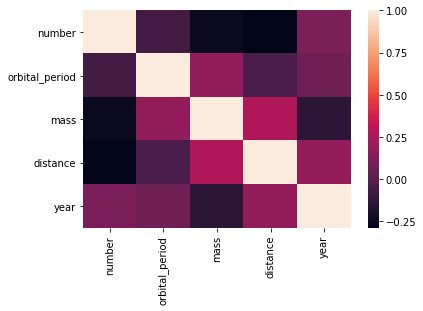

In [42]:
sns.heatmap(planets_clean.corr())
plt.show()